# Exploratory Data Analysis

In this section, we load the data and do some preliminary data exploration to see which factors have an impact on whether a water pump is functional or not.

Based on the analysis below, we observe that the following variables may be indicative of whether a water point is functional or not:
- water point funder: depending on who the funder is, some water points have more functional wells, and others have more non-functional wells
- installer: depending on who the funder is, some water points have more functional wells, and others have more non-functional wells
- region: some regions have more functional wells than others
- scheme management: some water point management schemes have more functional wells than others
- construction year: most water points are constructed more recently; however, for non-functional wells, a greater proportion were constructed in earlier years 
- extraction type: some extraction types have more functional water points
- quantity group (quantity of water available): a very small proportion of functional water points are dry, while a much larger proportion of non-functional water points are dry
- gps height: the data suggests that a larger proportion of non-functional water points have smaller heights
- population around water point: a larger proportion of non-functional water points have very low populations around the water point

In [22]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import os
import math
import re
from scipy import stats
from scipy.interpolate import interp1d
from sklearn import preprocessing
os.chdir("C:\\Users\\hanzhu\\Documents\\DAT210x-master\\A - Water")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)

In [2]:
# Read in data
indep_vars = pd.read_csv('predictor_vars.csv')
outcome = pd.read_csv('outcome_vars.csv')

In [5]:
# Merge predictors and outcome var for now
data = pd.merge(indep_vars, outcome, on='id')

In [7]:
# What is the total number of observations? 
data.shape[0]

59400

In [12]:
# What do the first few rows of data look like?
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [8]:
# How many waterpoints are functional, non-functional, needs repair?
data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

We can see that a little over half of the water points (54%) are functional. The "functional needs repair" category has the least number of observations.

# Examine 'amount_tsh'

In [13]:
# Examine 'amount_tsh'. This is the total static head, or amount of water available to a waterpoint. 
data[data['amount_tsh']==0]['amount_tsh'].value_counts()

0.0    41639
Name: amount_tsh, dtype: int64

So, it looks like about 2/3 of the have no water available to the waterpoint.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091AFB25E10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B038E358>]], dtype=object)

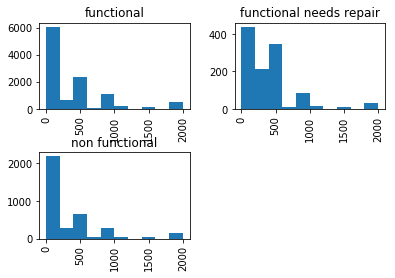

In [14]:
data[data['amount_tsh']>0]['amount_tsh'].hist(by=data['status_group'], range=(1, 2000))

It looks like whether the water point is functional or not, most water points have between 0 to 500 units of water, with most water points being 0 to 50 (except for 'functional needs repair', which has a large number of water points with water levels beyond 200.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B03C3CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B0626358>]], dtype=object)

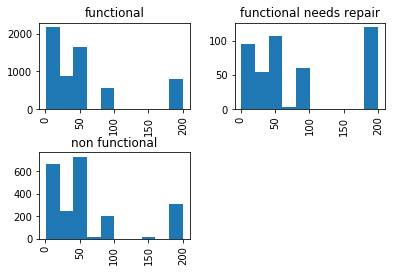

In [15]:
data[data['amount_tsh']>0]['amount_tsh'].hist(by=data['status_group'], range=(1, 200))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B06F6F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B0BFFBA8>]], dtype=object)

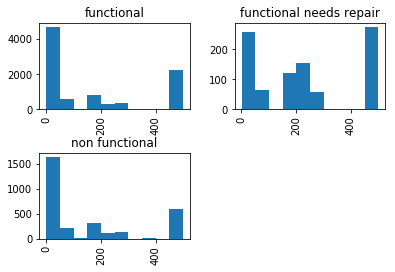

In [16]:
data[data['amount_tsh']>0]['amount_tsh'].hist(by=data['status_group'], range=(1, 500))

# Funders

In [19]:
# funder refers to who funded the builing of the water point.
data.groupby(['funder', 'status_group']).size()

funder                          status_group           
0                               functional                  445
                                functional needs repair       3
                                non functional              329
A/co Germany                    functional                    7
                                functional needs repair       1
                                non functional                7
Aar                             functional                   22
                                functional needs repair       4
                                non functional                7
Abas Ka                         functional                    1
Abasia                          functional                   36
                                functional needs repair       2
                                non functional                5
Abc-ihushi Development Cent     non functional                1
Abd                             functional      

There are some large funders, such as 'Amref', 'Adb', 'Jica', 'Oxfam', 'Oikos E.Afrika', 'Tasaf', 'Unicef', etc., to name a few. There are also almost 800 water points with missing funders.

# Installer

In [50]:
data.groupby(['installer', 'status_group']).size()

installer                       status_group           
-                               functional                   2
                                non functional               1
0                               functional                 445
                                functional needs repair      3
                                non functional             329
A.D.B                           functional needs repair      1
AAR                             functional needs repair      2
                                non functional               2
ABASIA                          functional                  23
                                functional needs repair      2
                                non functional               4
ABD                             functional                   1
ABDALA                          non functional               1
ABDUL                           non functional               1
AC                              functional                   2

# Basin

In [20]:
# The geographic water basin of the water point.
data.groupby(['basin', 'status_group']).size()

basin                    status_group           
Internal                 functional                 4482
                         functional needs repair     557
                         non functional             2746
Lake Nyasa               functional                 3324
                         functional needs repair     250
                         non functional             1511
Lake Rukwa               functional                 1000
                         functional needs repair     270
                         non functional             1184
Lake Tanganyika          functional                 3107
                         functional needs repair     742
                         non functional             2583
Lake Victoria            functional                 5100
                         functional needs repair     989
                         non functional             4159
Pangani                  functional                 5372
                         functional nee

One basin has more non-functional water points than functional ones: 'Lake Rukwa'. All other basins have more functional ones than non-functional.

Next, look at regional divisions. For background, Tanzania is divided into regions, which are then divided into districts. Each district is then divided into wards.

# Region

In [23]:
data.groupby(['region', 'status_group']).size()

region         status_group           
Arusha         functional                 2294
               functional needs repair     175
               non functional              881
Dar es Salaam  functional                  461
               functional needs repair       3
               non functional              341
Dodoma         functional                 1009
               functional needs repair     209
               non functional              983
Iringa         functional                 4141
               functional needs repair     123
               non functional             1030
Kagera         functional                 1727
               functional needs repair     304
               non functional             1285
Kigoma         functional                 1363
               functional needs repair     603
               non functional              850
Kilimanjaro    functional                 2640
               functional needs repair     322
               non fu

Some regions where most water points are not functional include Lindi, Mara, and Mtwara.

In [26]:
# District
data.groupby(['lga', 'status_group']).size()

lga               status_group           
Arusha Rural      functional                  875
                  functional needs repair      48
                  non functional              329
Arusha Urban      functional                   42
                  functional needs repair       7
                  non functional               14
Babati            functional                  381
                  functional needs repair      53
                  non functional               77
Bagamoyo          functional                  730
                  functional needs repair       2
                  non functional              265
Bahi              functional                  158
                  non functional               66
Bariadi           functional                  580
                  functional needs repair     409
                  non functional              188
Biharamulo        functional                  274
                  functional needs repair      21
        

There are some districts (e.g. Chamwino, Chunya, Igunga, Manyoni) with more non-functional wells than functional ones.

# GPS Height

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B3E3A780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B3C34128>]], dtype=object)

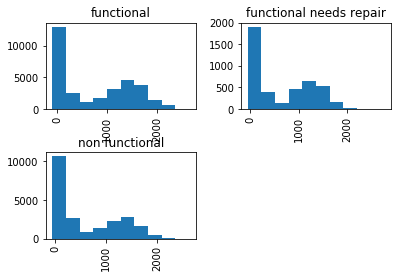

In [28]:
# Well altitude - 'gps_height'
data['gps_height'].hist(by=data['status_group'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B3CF2908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B50B9D68>]], dtype=object)

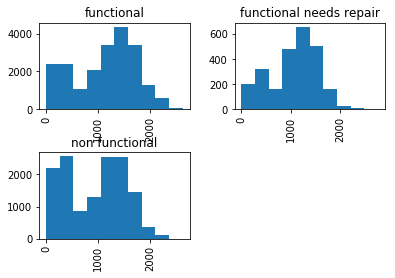

In [29]:
# Most wells above have 0 or negative gps height.
# Look at height, after taking out water points with gps height 0
data[data['gps_height']>0]['gps_height'].hist(by=data['status_group'])

Looks like the distribution is similar; however, for non-functional water points, there is a large proportion of water points with very small gps heights.

In [30]:
# What is the median altitude?
data.groupby(['status_group'])['gps_height'].median()

status_group
functional                 550
functional needs repair    385
non functional             293
Name: gps_height, dtype: int64

In [31]:
# What is the mean altitude?
data.groupby(['status_group'])['gps_height'].mean()

status_group
functional                 740.131188
functional needs repair    627.607135
non functional             574.464774
Name: gps_height, dtype: float64

# Longitude & Latitude

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B51B52E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B4EC14A8>]], dtype=object)

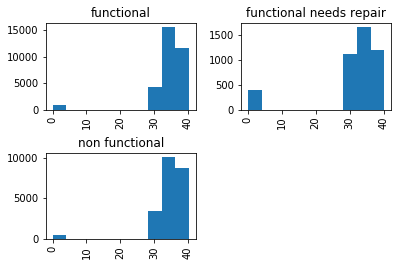

In [32]:
# Longitude
data['longitude'].hist(by=data['status_group'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B4F4FC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B636E2E8>]], dtype=object)

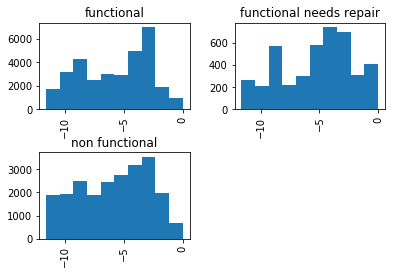

In [33]:
# Latitude
data['latitude'].hist(by=data['status_group'])

As we are looking at Tanzania, it is expected that for the most part, latitude and longitude should fall within a set range.

# Population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B64626D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B67DC080>]], dtype=object)

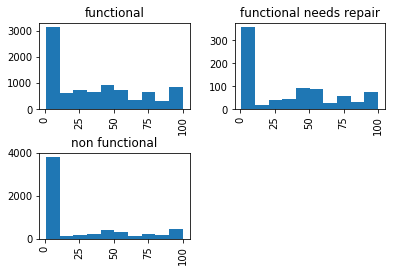

In [34]:
# Population - this is the population around the well
data[data['population']>0]['population'].hist(by=data['status_group'], range=(1, 100))

In [35]:
# What is the mean population around wells?
data.groupby(['status_group'])['population'].mean()

status_group
functional                 187.553303
functional needs repair    175.102154
non functional             170.016430
Name: population, dtype: float64

In [36]:
# What is the median population around wells?
data.groupby(['status_group'])['population'].median()

status_group
functional                 40
functional needs repair    25
non functional              1
Name: population, dtype: int64

Most water points have small populations (<25). As expected, around non-functional wells, the population is much smaller, as we can see from the mean. 

# Public Meeting

In [38]:
# Not sure what exactly this refers to, but perhaps it refers to whether the local council holds public meetings.
data.groupby(['status_group', 'public_meeting']).size()

status_group             public_meeting
functional               False              2173
                         True              28408
functional needs repair  False               442
                         True               3719
non functional           False              2440
                         True              18884
dtype: int64

Regardless of whether the well is functional or not, most water points have public meetings.

# Scheme Management

In [39]:
# Scheme Management
data.groupby(['scheme_management', 'status_group']).size()

scheme_management  status_group           
Company            functional                   534
                   functional needs repair       37
                   non functional               490
None               functional                     1
Other              functional                   458
                   functional needs repair       22
                   non functional               286
Parastatal         functional                   966
                   functional needs repair      202
                   non functional               512
Private operator   functional                   729
                   functional needs repair       23
                   non functional               311
SWC                functional                    20
                   functional needs repair        1
                   non functional                76
Trust              functional                    46
                   functional needs repair        5
                   no

Some schemes have more functional wells than others (e.g. Parastatal, Private Operator, WUA, WUG, Water Board, 
Water Authority)

# Permit

In [41]:
# Whether there was a permit
data.groupby(['status_group', 'permit']).size()

status_group             permit
functional               False      9045
                         True      21541
functional needs repair  False      1320
                         True       2697
non functional           False      7127
                         True      14614
dtype: int64

It appears whether there is a water point that is functional or not, most water points have permits (with twice the water points having permits).

# Construction Year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000091B691B710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000091B6A552B0>]], dtype=object)

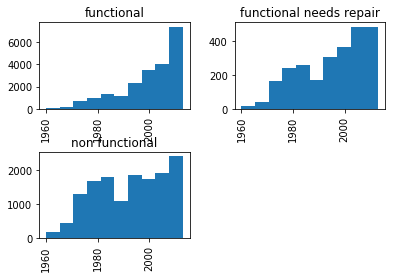

In [46]:
data[data['construction_year']>0]['construction_year'].hist(by=data['status_group'])

Non functional wells have a greater number of wells built earlier on

# Extraction Type

In [43]:
# Extraction Type
data.groupby(['extraction_type', 'status_group']).size()

extraction_type            status_group           
afridev                    functional                  1200
                           functional needs repair       42
                           non functional               528
cemo                       functional                    45
                           functional needs repair        9
                           non functional                36
climax                     functional                     8
                           non functional                24
gravity                    functional                 16048
                           functional needs repair     2701
                           non functional              8031
india mark ii              functional                  1448
                           functional needs repair       79
                           non functional               873
india mark iii             functional                    44
                           functional needs repai

Some extraction types have more functional water points than others

# Management Group

In [44]:
# Management Group
data.groupby(['status_group', 'management_group']).size()

status_group             management_group
functional               commercial           2235
                         other                 528
                         parastatal           1020
                         unknown               224
                         user-group          28252
functional needs repair  commercial            117
                         other                  56
                         parastatal            211
                         unknown                27
                         user-group           3906
non functional           commercial           1286
                         other                 359
                         parastatal            537
                         unknown               310
                         user-group          20332
dtype: int64

Doesn't seem that management group makes a difference in the distribution of functional or non-functional water points; most water points are managed by user groups.

# Quality Group

In [45]:
# Quality Group - quality of water 
data.groupby(['status_group', 'quality_group']).size()

status_group             quality_group
functional               colored            246
                         fluoride           157
                         good             28760
                         milky              438
                         salty             2394
                         unknown            264
functional needs repair  colored             54
                         fluoride            13
                         good              3904
                         milky               14
                         salty              297
                         unknown             35
non functional           colored            190
                         fluoride            47
                         good             18154
                         milky              352
                         salty             2504
                         unknown           1577
dtype: int64

For all 3 types of water points, "good" and "salty" have the greatest number

# Quantity Group

In [47]:
# Quantity of water
data.groupby(['status_group', 'quantity_group']).size()

status_group             quantity_group
functional               dry                 157
                         enough            21648
                         insufficient       7916
                         seasonal           2325
                         unknown             213
functional needs repair  dry                  37
                         enough             2400
                         insufficient       1450
                         seasonal            416
                         unknown              14
non functional           dry                6052
                         enough             9138
                         insufficient       5763
                         seasonal           1309
                         unknown             562
dtype: int64

For the functional ones, they have a very small number of dry wells, while non-functional wells have
a large number of dry wells (thus non-functional)

# Source

In [48]:
data.groupby(['status_group', 'source']).size()

status_group             source              
functional               dam                       253
                         hand dtw                  497
                         lake                      162
                         machine dbh              5422
                         other                     126
                         rainwater harvesting     1386
                         river                    5465
                         shallow well             8324
                         spring                  10592
                         unknown                    32
functional needs repair  dam                        24
                         hand dtw                   17
                         lake                       12
                         machine dbh               491
                         other                       1
                         rainwater harvesting      314
                         river                    1221
                   

Sprint, shallow well, & machine bored are the most common sources

# Water Point Type

In [49]:
data.groupby(['status_group', 'waterpoint_type']).size()

status_group             waterpoint_type            
functional               cattle trough                     84
                         communal standpipe             17726
                         communal standpipe multiple     2235
                         dam                                6
                         hand pump                      10805
                         improved spring                  563
                         other                            840
functional needs repair  cattle trough                      2
                         communal standpipe              2260
                         communal standpipe multiple      648
                         hand pump                       1029
                         improved spring                   85
                         other                            293
non functional           cattle trough                     30
                         communal standpipe              8536
                 

Most are communal type & hand pump